This notebook runs a pipeline with the following steps:
* Create a test Visibility dataset.
   * No visibility sample noise. Just testing that things are working exactly as expected.
   * Using the GLEAM sky model and a common everybeam station beam model.
   * Add complex Gaussian noise corruptions to station gains and leakage.
   * Impose a $\lambda^{2}$-dependent rotate on each station Jones matrix.
   * Write to disk in MSv2 format.
* Read MSv2 data into Visibility dataset.$^{*}$
* Predict model visibilities (using GLEAM and everybeam).$^{*}$
* Do polarised bandpass calibration.$^{*}$
* Fit for the  $\lambda^{2}$-dependent rotation of each station.
* Redo polarised bandpass calibration.$^{*}$
* Check for convergence.$^{*}$

\* xarray dataset map_blocks() is used to distribute frequency sub-bands across dask tasks.

In [1]:
from time import perf_counter

from ska_sdp_instrumental_calibration.workflow.pipelines import (
    bandpass_polarisation,
)

<frozen abc>:106: FutureWarning: xarray subclass Visibility should explicitly define __slots__


2025-02-12 13:30:24,451 - workflow.pipeline_config - INFO - Simulating demo MSv2 input
2025-02-12 13:30:24,452 - workflow.pipeline_config - INFO - Initialising the EveryBeam telescope model with /data/EOS_1/mit183/SKA/SP-4626/OSKAR_MOCK.ms
2025-02-12 13:30:24,453 - workflow.pipeline_config - INFO - Generating a demo MSv2 Measurement Set demo.ms
2025-02-12 13:30:24,454 - workflow.pipeline_config - INFO - Generating LSM for simulation with:
2025-02-12 13:30:24,455 - workflow.pipeline_config - INFO -  - Catalogue file: /data/EOS_1/mit183/gleamegc.dat
2025-02-12 13:30:24,456 - workflow.pipeline_config - INFO -  - Search radius: 5.0 deg
2025-02-12 13:30:24,456 - workflow.pipeline_config - INFO -  - Flux limit: 1 Jy
2025-02-12 13:30:25,047 - processing_tasks.lsm - INFO - extracted 37 GLEAM components
2025-02-12 13:30:25,048 - workflow.pipeline_config - INFO - LSM: found 37 components
2025-02-12 13:30:25,072 - workflow.utils - INFO - Using AA1-Low with 20 stations
2025-02-12 13:30:25,557 - pr

Could not load dataset for frequency 100 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 100 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 101 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 102 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 103 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 103 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 104 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 105 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 106 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 107 MHz, using the nearest 

2025-02-12 13:30:29,077 - workflow.utils - INFO - Applying direction-independent gain corruptions
2025-02-12 13:30:29,077 - workflow.utils - INFO - Applying direction-independent leakage corruptions
2025-02-12 13:30:29,078 - workflow.utils - INFO - Applying DI lambda^2-dependent rotations
2025-02-12 13:30:29,610 - pipeline.bandpass_calibration - INFO - Starting pipeline with 16-channel chunks
2025-02-12 13:30:29,611 - pipeline.bandpass_calibration - INFO - No dask cluster supplied. Using LocalCluster
2025-02-12 13:30:30,776 - pipeline.bandpass_calibration - INFO - Generating LSM for predict with:
2025-02-12 13:30:30,777 - pipeline.bandpass_calibration - INFO -  - Catalogue file: /data/EOS_1/mit183/gleamegc.dat
2025-02-12 13:30:30,778 - pipeline.bandpass_calibration - INFO -  - Search radius: 5.0 deg
2025-02-12 13:30:30,778 - pipeline.bandpass_calibration - INFO -  - Flux limit: 1 Jy
2025-02-12 13:30:31,441 - processing_tasks.lsm - INFO - extracted 37 GLEAM components
2025-02-12 13:30:3

Could not load dataset for frequency 112 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 113 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 114 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 114 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 115 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 116 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 117 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 117 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 118 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 119 MHz, using the nearest 

_jones_sub_solve: gain solutions failed to converge for channel 0
_jones_sub_solve: gain solutions failed to converge for channel 0
_jones_sub_solve: gain solutions failed to converge for channel 0
_jones_sub_solve: gain solutions failed to converge for channel 1
_jones_sub_solve: gain solutions failed to converge for channel 0
_jones_sub_solve: gain solutions failed to converge for channel 1
_jones_sub_solve: gain solutions failed to converge for channel 2
_jones_sub_solve: gain solutions failed to converge for channel 1
_jones_sub_solve: gain solutions failed to converge for channel 1
_jones_sub_solve: gain solutions failed to converge for channel 3
_jones_sub_solve: gain solutions failed to converge for channel 2
_jones_sub_solve: gain solutions failed to converge for channel 2
_jones_sub_solve: gain solutions failed to converge for channel 2
_jones_sub_solve: gain solutions failed to converge for channel 4
_jones_sub_solve: gain solutions failed to converge for channel 3
_jones_sub

Could not load dataset for frequency 100 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 100 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 101 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 102 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 103 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 103 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 104 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 105 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 106 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 107 MHz, using the nearest 

2025-02-12 13:30:38,460 - pipeline.bandpass_calibration - INFO - Writing solutions to demo.h5
2025-02-12 13:30:38,463 - workflow.utils - INFO - exporting cal solutions to demo.h5
2025-02-12 13:30:38,470 - workflow.utils - INFO - output dimensions: {'time': 1, 'ant': 20, 'freq': 64, 'pol': 4}
2025-02-12 13:30:38,490 - pipeline.bandpass_calibration - INFO - Checking results
2025-02-12 13:30:38,491 - pipeline.bandpass_calibration - INFO - Convergence checks passed


pipeline ran in 14.4 seconds


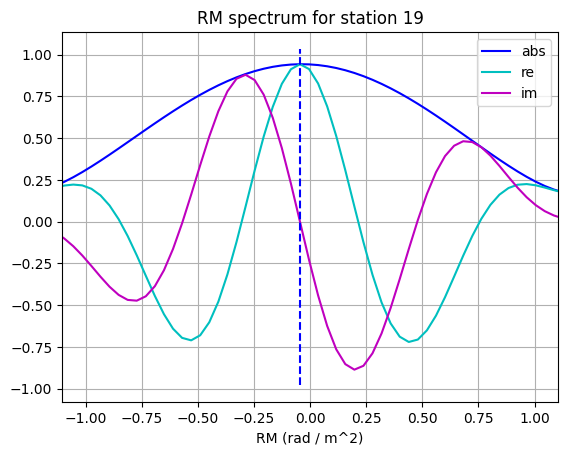

In [2]:
ddir = "/data/EOS_1/mit183"
t0 = perf_counter()
bandpass_polarisation.run(
    {
        # Required external data
        "gleamfile": f"{ddir}/gleamegc.dat",
        "eb_ms": f"{ddir}/SKA/SP-4626/OSKAR_MOCK.ms",
        "eb_coeffs": f"{ddir}/SKA/SP-4626/ska-sdp-func-everybeam/coeffs",
        # Other parameters
        "ms_name": "demo.ms",
        "h5parm_name": "demo.h5",
        "gains": True,
        "leakage": True,
        "rotation": True,
        "wide_channels": True,
    }
)
print(f"pipeline ran in {perf_counter() - t0:.1f} seconds")